<a href="https://www.kaggle.com/code/logxdx158/flight-delay-prediction?scriptVersionId=207476987" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mini-flight-delay-prediction/flight_delays_test.csv
/kaggle/input/mini-flight-delay-prediction/flight_delays_train.csv


In [24]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [25]:

#  load dataset

df_train = pd.read_csv("/kaggle/input/mini-flight-delay-prediction/flight_delays_train.csv")

df_test = pd.read_csv("/kaggle/input/mini-flight-delay-prediction/flight_delays_test.csv")


In [26]:
df_train.info()

print()

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          100000 non-null  object
 1   DayofMonth     100000 non-null  object
 2   DayOfWeek      100000 

# EDA

In [27]:
print("train:")

print(df_train.head())

print("\n\ntest:")

print(df_test.head())

train:
  Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance  \
0   c-8       c-21       c-7     1934            AA    ATL  DFW       732   
1   c-4       c-20       c-3     1548            US    PIT  MCO       834   
2   c-9        c-2       c-5     1422            XE    RDU  CLE       416   
3  c-11       c-25       c-6     1015            OO    DEN  MEM       872   
4  c-10        c-7       c-6     1828            WN    MDW  OMA       423   

  dep_delayed_15min  
0                 N  
1                 N  
2                 N  
3                 N  
4                 Y  


test:
  Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance
0   c-7       c-25       c-3      615            YV    MRY  PHX       598
1   c-4       c-17       c-2      739            WN    LAS  HOU      1235
2  c-12        c-2       c-7      651            MQ    GSP  ORD       577
3   c-3       c-25       c-7     1614            WN    BWI  MHT       377
4   c-6        c-6  

In [28]:
print("Unique values of columns\n----------------------------")

for i in df_train.columns:

    print(i,":", len(df_train[i].unique()))

Unique values of columns
----------------------------
Month : 12
DayofMonth : 31
DayOfWeek : 7
DepTime : 1300
UniqueCarrier : 22
Origin : 289
Dest : 289
Distance : 1310
dep_delayed_15min : 2


In [29]:
# Function to remove 'c-' prefix from relevant columns

def clean_column_values(df, columns):

    for col in columns:

        df[col] = df[col].str.replace('c-', '', regex=False).astype(int)

    return df



# Clean the 'Month', 'DayofMonth', 'DayOfWeek' columns in the train and test datasets

columns_to_clean = ['Month', 'DayofMonth', 'DayOfWeek']

df_train = clean_column_values(df_train, columns_to_clean)

df_test = clean_column_values(df_test, columns_to_clean)



# Convert the target column ('dep_delayed_15min') to binary values (1 for 'Y', 0 for 'N')

df_train['dep_delayed_15min'] = df_train['dep_delayed_15min'].apply(lambda x: 1 if x == 'Y' else 0)




In [30]:


encoding_labels = ['UniqueCarrier', 'Origin', 'Dest']


for i in encoding_labels:
    values, counts = np.unique(df_train[i], return_counts=True)
    print(f"\n\n{i}:\n---------------------")
    print("Data present in Train but not in test:")
    for j, c in zip(values, counts):
        if j not in  df_test[i].unique():
            print(f"{j}: {c}")


    values, counts = np.unique(df_test[i], return_counts=True)
    print("\nData present in test but not in train:")
    for j, c in zip(values, counts):
        if j not in  df_train[i].unique():
            print(f"{j}: {c}")






UniqueCarrier:
---------------------
Data present in Train but not in test:
DH: 966
HP: 1378
TZ: 446

Data present in test but not in train:
9E: 3461


Origin:
---------------------
Data present in Train but not in test:
CDC: 10
HKY: 7
HVN: 7
ISO: 8
PIE: 3
VCT: 1
VIS: 1

Data present in test but not in train:
ALO: 2
BJI: 3
CMX: 2
EAU: 1
ELM: 13
EWN: 7
HHH: 13
INL: 3
MTH: 3
PLN: 5
PMD: 4
RHI: 3
ROW: 3
SLE: 12
SOP: 2
SUX: 4
TTN: 8
YKM: 11


Dest:
---------------------
Data present in Train but not in test:
CDC: 7
GST: 2
HKY: 5
HVN: 10
ISO: 9
PIE: 5
TEX: 1
VCT: 1
VIS: 7

Data present in test but not in train:
ADK: 1
ALO: 3
BJI: 1
CMX: 2
EAU: 1
ELM: 14
EWN: 7
HHH: 23
INL: 3
MTH: 1
OAJ: 14
PLN: 5
PMD: 3
RHI: 4
ROW: 2
SLE: 3
SUX: 5
YKM: 6


In [31]:
# encoding data

def encode_labels(df_train, df_test, encoding_labels):



    label_mapping = {}

    total_counts = []

    

    for label in encoding_labels:

        label_number = 0

        label_mapping[label] = {}

        for value in df_train[label].unique():

            if value in df_test[label].unique():

                label_mapping[label][value] = label_number

                label_number += 1

        

        for value in df_train[label].unique():

            if value not in df_test[label].unique():

                label_mapping[label][value] = label_number

                label_number += 1

        

        for value in df_test[label].unique():

            if value not in df_train[label].unique():

                label_mapping[label][value] = label_number

                label_number += 1



        total_counts.append(label_number)



    for label in encoding_labels:

        df_train[label] = df_train[label].map(label_mapping[label])

        df_test[label] = df_test[label].map(label_mapping[label])



    return df_train, df_test, label_mapping, total_counts


In [32]:
df_train, df_test, label_mapping, total_labels  = encode_labels(df_train, df_test, encoding_labels)

In [33]:
from sklearn.preprocessing import MinMaxScaler



# Initialize the MinMaxScaler

scaler = MinMaxScaler()



# Fit and transform 'Distance' columns

df_train[['Distance']] = scaler.fit_transform(df_train[['Distance']])



# Apply the same transformation to the test set

df_test[['Distance']] = scaler.transform(df_test[['Distance']])


In [34]:
df_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,0,0,0,0.142336,0
1,4,20,3,1548,1,1,1,0.163017,0
2,9,2,5,1422,2,2,2,0.078264,0
3,11,25,6,1015,3,3,3,0.170722,0
4,10,7,6,1828,4,4,4,0.079684,1


In [35]:
df_test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,7,25,3,615,13,139,17,0.115166
1,4,17,2,739,4,11,91,0.244323
2,12,2,7,651,10,29,11,0.110908
3,3,25,7,1614,4,42,138,0.070357
4,6,6,3,1505,9,23,8,0.046229


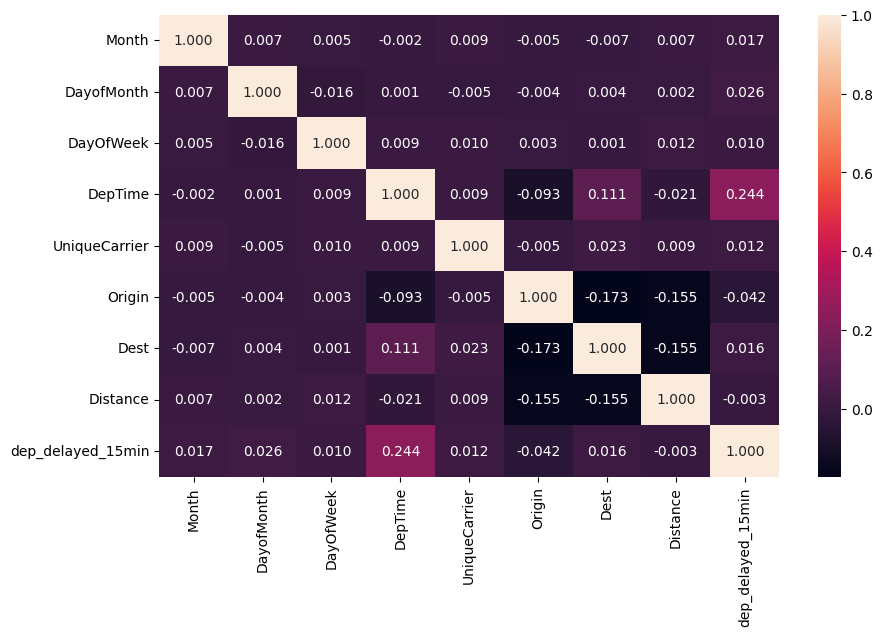

In [36]:
plt.figure(figsize=(10, 6))

sns.heatmap(df_train.corr(), annot=True, fmt='.3f')

plt.show()

In [37]:
df_train.dep_delayed_15min.value_counts()

dep_delayed_15min
0    80956
1    19044
Name: count, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE



# Initialize the SMOTE object

smote = SMOTE(random_state=42)



# Fit the SMOTE object to the train data
X_train, y_train = df_train.drop('dep_delayed_15min', axis=1), df_train['dep_delayed_15min']
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

y_resampled.value_counts()


dep_delayed_15min
0    80956
1    80956
Name: count, dtype: int64

In [39]:
import os
import shutil

# Path to Kaggle working directory
working_dir = "/kaggle/working/"

# Remove all files in the working directory
for filename in os.listdir(working_dir):
    file_path = os.path.join(working_dir, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)  # Remove file or link
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)  # Remove directory and its contents
    except Exception as e:
        print(f"Failed to delete {file_path}. Reason: {e}")

print("Kaggle working directory cleared.")


Kaggle working directory cleared.


In [40]:
!nvidia-smi

Fri Nov 15 05:01:43 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P0             29W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Training & Validation

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)
X_resampled, X_val_resampled, y_resampled, y_val_resampled = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)

In [44]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import multiprocessing as mp
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = {
    "DecisionTree": DecisionTreeClassifier(max_depth=15, min_samples_split=5),
    "RandomForest": RandomForestClassifier(max_depth=23, n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=500),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, max_depth=3),
    
    # XGBoost with GPU support
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=3, use_label_encoder=False, eval_metric='logloss'),
    
    # CatBoost with GPU support
    "CatBoost": CatBoostClassifier(n_estimators=100, depth=3, verbose=0, task_type='GPU'),
    
    "GaussianNB": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),    
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, max_depth=10),
}

# For Stacking Classifier, we’ll use a subset of the trained models as estimators
stacking_estimators = [
    ('RandomForest', RandomForestClassifier(max_depth=23, n_estimators=50)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=50, max_depth=3)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50)),
    ('LogisticRegression', LogisticRegression(max_iter=1000))
]
models["Stacking"] = StackingClassifier(estimators=stacking_estimators, final_estimator=LogisticRegression())

# Function to train and save each model
def train_and_save(model_name, model, X, y, suffix):
    model.fit(X, y)
    with open(f"/kaggle/working/{model_name}_{suffix}.pkl", "wb") as file:
        pickle.dump(model, file)
    print(f"{model_name} trained on {suffix} data and saved.")

# Prepare data for multiprocessing
tasks = []
for model_name, model in models.items():
    # Add tasks for both original and resampled data
    tasks.append((model_name, model, X_train, y_train, "original"))
    tasks.append((model_name, model, X_resampled, y_resampled, "resampled"))

# Use multiprocessing to run tasks in parallel
if __name__ == "__main__":
    with mp.Pool(processes=min(mp.cpu_count(), 8)) as pool:
        pool.starmap(train_and_save, tasks)

    print("All models have been trained and saved on both original and resampled data.")


DecisionTree trained on original data and saved.
DecisionTree trained on resampled data and saved.
XGBoost trained on original data and saved.
XGBoost trained on resampled data and saved.
CatBoost trained on original data and saved.
CatBoost trained on resampled data and saved.
GaussianNB trained on original data and saved.
GaussianNB trained on resampled data and saved.
LDA trained on original data and saved.
LDA trained on resampled data and saved.
QDA trained on original data and saved.
QDA trained on resampled data and saved.
LogisticRegression trained on original data and saved.
GradientBoosting trained on original data and saved.
LogisticRegression trained on resampled data and saved.
KNN trained on original data and saved.
KNN trained on resampled data and saved.
RandomForest trained on original data and saved.
ExtraTrees trained on original data and saved.
ExtraTrees trained on resampled data and saved.
GradientBoosting trained on resampled data and saved.
AdaBoost trained on o

In [46]:
import pickle
from sklearn.metrics import accuracy_score, f1_score
import os

# Define a dictionary to store the models' names and their corresponding file paths
model_file_paths = [f"/kaggle/working/{model_name}_{suffix}.pkl" for model_name in models.keys() for suffix in ["original", "resampled"]]

# Load each model and evaluate on the test data
def load_and_evaluate(model_file, X_test, y_test):
    # Load the model from the pickle file
    with open(model_file, "rb") as file:
        model = pickle.load(file)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    with open("/kaggle/working/results.txt", "a") as file:
        file.write(f"Model: {model_file}\n")
        file.write(f"Accuracy: {accuracy:.4f}\n")
        file.write(f"F1 Score: {f1:.4f}\n")
        file.write("-" * 30 + "\n")
    
    # Print the results
    print(f"Model: {model_file}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)

# Evaluate on the test data
if __name__ == "__main__":
    # Assuming X_test and y_test are already defined (from your test data)
    # Load and evaluate each model
    c=0
    for model_file in model_file_paths:
        c+=1
        load_and_evaluate(model_file, X_val, y_val)
        load_and_evaluate(model_file, X_val_resampled, y_val_resampled)
        if c%2==0:
            print()
            with open("/kaggle/working/results.txt", "a") as file:
                file.write("\n")

    print("Evaluation of all models completed.")


Model: /kaggle/working/DecisionTree_original.pkl
Accuracy: 0.7913
F1 Score: 0.2458
------------------------------
Model: /kaggle/working/DecisionTree_original.pkl
Accuracy: 0.5882
F1 Score: 0.3690
------------------------------
Model: /kaggle/working/DecisionTree_resampled.pkl
Accuracy: 0.6452
F1 Score: 0.4306
------------------------------
Model: /kaggle/working/DecisionTree_resampled.pkl
Accuracy: 0.7026
F1 Score: 0.7224
------------------------------

Model: /kaggle/working/RandomForest_original.pkl
Accuracy: 0.8196
F1 Score: 0.1759
------------------------------
Model: /kaggle/working/RandomForest_original.pkl
Accuracy: 0.6498
F1 Score: 0.4703
------------------------------
Model: /kaggle/working/RandomForest_resampled.pkl
Accuracy: 0.7844
F1 Score: 0.6067
------------------------------
Model: /kaggle/working/RandomForest_resampled.pkl
Accuracy: 0.8096
F1 Score: 0.8179
------------------------------

Model: /kaggle/working/AdaBoost_original.pkl
Accuracy: 0.8141
F1 Score: 0.1126
---